## **Homework 1 | Applied Machine Learning**


---
####*Ziqing Li (zl648), Renata Anastasia (ra568)*

##I. The Housing Prices

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

####Question 1. Join the House Prices - Advanced Regression Techniques competition on Kaggle. Download the training and test data.

Import train data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (10).csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['train.csv'])).drop(columns=['Id'])
df.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [ ]:
df.shape

(1460, 80)

Import test data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test (9).csv


In [ ]:
df_t = pd.read_csv(io.BytesIO(uploaded['test.csv']))
df_t.head(10)
df_t.shape

(1459, 80)

####Question 2. Give 3 examples of continuous and categorical features in the dataset; choose one feature of each type and plot the histogram to illustrate the distribution.



Continous features:
1. LotFrontage: Linear feet of street connected to the property
2. LotArea: Lot size in square feet
3. BsmtFinSF2: Type 2 finished square feet

Categorical features:
1. MSSubClass: Type of dwelling involved in the sale
2. MSZoning: General zoning classification of the sale
3. Street: Type of road access to property

[Text(0.5, 1.0, 'Histogram of LotFrontage')]

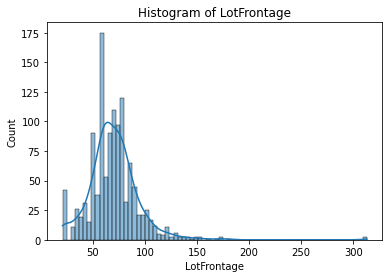

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#Plot histogram for continous features (LotFrontage)
sns.histplot(data=df, x='LotFrontage',kde=True).set(title=
                                                    'Histogram of LotFrontage')

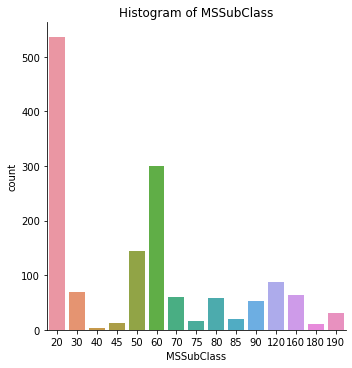

In [ ]:
#Plot histogram for categorical features (MSSubClass)
sns.catplot(x='MSSubClass', kind="count",data=df).set(title=
                                                      'Histogram of MSSubClass')



---


## In order to predict house prices using given data, we will follow the steps below:

- Pre-processing
1. Impute missing data for all training dataset
2. Add some calculated features
3. Normalize continous variable and OHE for categorical feature
4. Split training data into Train Data and Holdout data (70:30)

- Model Training & Selection
5. Check significance of variable for Train Data and remove variable with high correlation
6. Select features and create OLS model using Train Data
7. Evaluate model to Holdout data and measure the R2
8. If the model is not perfroming well, repeat step 6-7; Until the model is performing well, re-train the model now using all training dataset

- Prediction
9. Predict the housing price using test data



---



####Question 3. Pre-process your data, explain your pre-processing steps, and the reasons why you need them. (Hint: data pre-processing steps can include but are not restricted to: dealing with missing values,normalizing numerical values, dealing with categorical values etc.)


#####1. Impute missing data for all training dataset

In [ ]:
#Impute column means or fill default values to missing or null values
df.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
MSSubClass         0
dtype: int64

As we can see from above, these are variables that contain null values. In order to overcome that, Imputation is needed to avoid distortion in the variable distribution. We also dropped some data that has majority null values as it shows low variance.

In [ ]:
 #Drop data when majority of data is null (low variance)
df=df.drop(columns=['Alley','PoolQC', 'MiscFeature'])

#Impute missing continuous values
df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True) 

df['MasVnrArea'].fillna(0, inplace=True) 
#For this feature, na means no/0 Masonry veneer
df['GarageYrBlt'].fillna(df['GarageYrBlt'].median(), inplace=True)


#Replace missing categorical values as 'none' 
#(meaning the houses do not have such features like garage, fence)
df['Fence'].fillna('NoFence', inplace=True)
df['FireplaceQu'].fillna('None', inplace=True)
df['GarageType'].fillna('None', inplace=True)
df['GarageFinish'].fillna('None', inplace=True)
df['GarageQual'].fillna('None', inplace=True)
df['GarageCond'].fillna('None', inplace=True)
df['BsmtExposure'].fillna('None', inplace=True)
df['BsmtFinType2'].fillna('None', inplace=True)
df['BsmtQual'].fillna('None', inplace=True)
df['BsmtCond'].fillna('None', inplace=True)
df['BsmtFinType1'].fillna('None', inplace=True)
df['MasVnrType'].fillna('None', inplace=True)
df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True)

In [ ]:
#Confirm there's no null value left
df.isnull().sum().sort_values(ascending=False).head(20)

MSSubClass      0
BedroomAbvGr    0
GarageType      0
FireplaceQu     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
HalfBath        0
CentralAir      0
FullBath        0
BsmtHalfBath    0
BsmtFullBath    0
GrLivArea       0
LowQualFinSF    0
2ndFlrSF        0
1stFlrSF        0
GarageYrBlt     0
GarageFinish    0
dtype: int64

####2. Add some calculated features

In [ ]:
# Add some calculated features that could be helpful & drop the original features

#the age of the house might impact the saleprice
df['building_age']=df['YrSold']-df['YearRemodAdd']

#the number of conditions exist in the house might impact saleprice
df['condition_ct']=2-(df['Condition1']=='Norm').astype(int)-(df[
    'Condition2']=='Norm').astype(int)

#Group style of houses by # of floors
df['Floor']=df['HouseStyle'].map({
       '1Story':1,
       '1.5Fin':1.5,
       '1.5Unf':1.5,
       '2Story':2,
       '2.5Fin':2.5,
       '2.5Unf':2.5,
       'SFoyer':2,
       'SLvl':2
})

# turn some of the quality/condition evaluations into numerics
df['ExterCond2']=df['ExterCond'].map({
       'Ex':5,
       'Gd':4,
       'TA':3,
       'Fa':2,
       'Po':1
})
df['ExterCond2']=df['ExterQual'].map({
       'Ex':5,
       'Gd':4,
       'TA':3,
       'Fa':2,
       'Po':1
})
df['BsmtQual2']=df['BsmtQual'].map({
       'Ex':5,
       'Gd':4,
       'TA':3,
       'Fa':2,
       'Po':1,
       'None':0
})
df['BsmtCond2']=df['BsmtCond'].map({
       'Ex':5,
       'Gd':4,
       'TA':3,
       'Fa':2,
       'Po':1,
       'None':0
})
df['HeatingQC2']=df['HeatingQC'].map({
       'Ex':5,
       'Gd':4,
       'TA':3,
       'Fa':2,
       'Po':1
})
df['KitchenQual2']=df['KitchenQual'].map({
       'Ex':5,
       'Gd':4,
       'TA':3,
       'Fa':2,
       'Po':1
})
df['GarageCond2']=df['GarageCond'].map({
       'Ex':5,
       'Gd':4,
       'TA':3,
       'Fa':2,
       'Po':1,
       'None':0
})
df['FireplaceQu2']=df['FireplaceQu'].map({
       'Ex':5,
       'Gd':4,
       'TA':3,
       'Fa':2,
       'Po':1,
       'None':0
})
df['GarageQual2']=df['GarageQual'].map({
       'Ex':5,
       'Gd':4,
       'TA':3,
       'Fa':2,
       'Po':1,
       'None':0
})
df['GarageCond2']=df['GarageCond'].map({
       'Ex':5,
       'Gd':4,
       'TA':3,
       'Fa':2,
       'Po':1,
       'None':0
})


to_drop = ['Condition1','Condition2','HouseStyle','ExterCond','ExterQual',
           'BsmtQual','BsmtCond','HeatingQC','KitchenQual','GarageCond',
           'FireplaceQu','GarageQual','GarageCond','YearRemodAdd','YearBuilt']

df.drop(to_drop, inplace=True, axis=1)

In [ ]:
#Check mapping result
df['GarageCond2'].unique()

array([3, 2, 0, 4, 1, 5])

#####3. Normalize continous variable and OHE for categorical feature
a. Normalize continous variable:
Normalizing data is important if variable is measured with different scales without distorting differences in the range of values


In [ ]:
#List all Continuous Variables
continous_var= ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2',
            'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF','GrLivArea',
            'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
           'ScreenPorch','MiscVal','YrSold','building_age']

In [ ]:
from sklearn.preprocessing import StandardScaler

#Apply standard normalization
scaler = StandardScaler().fit(df[continous_var])
df[continous_var] = pd.DataFrame(scaler.transform(df[continous_var]))
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,condition_ct,Floor,ExterCond2,BsmtQual2,BsmtCond2,HeatingQC2,KitchenQual2,GarageCond2,FireplaceQu2,GarageQual2
0,60,RL,-0.220875,-0.207142,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,2.0,4,4,3,5,4,3,0,3
1,20,RL,0.460320,-0.091886,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,1,1.0,3,4,3,5,3,3,3,3
2,60,RL,-0.084636,0.073480,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,2.0,4,4,3,5,4,3,3,3
3,70,RL,-0.447940,-0.096897,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,2.0,3,3,4,4,4,3,4,3
4,60,RL,0.641972,0.375148,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,2.0,4,4,3,5,4,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,-0.357114,-0.260560,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,2.0,3,4,3,5,3,3,3,3
1456,20,RL,0.687385,0.266407,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,1.0,3,4,3,3,3,3,3,3
1457,70,RL,-0.175462,-0.147810,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,2.0,5,3,4,5,4,3,4,3
1458,20,RL,-0.084636,-0.080160,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,1.0,3,3,3,4,4,3,0,3


In [ ]:
#Repeat above transformations to testing data

#Drop data when majority of data is null (low variance)
df_t=df_t.drop(columns=['Alley','PoolQC', 'MiscFeature'])

#Impute missing continuous values
df_t['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True) 
#Mean can be to impute if we have normal distribution
df_t['MasVnrArea'].fillna(0, inplace=True)
df_t['BsmtHalfBath'].fillna(0, inplace=True)
df_t['BsmtFullBath'].fillna(0, inplace=True)
df_t['BsmtFinSF1'].fillna(0, inplace=True)
df_t['GarageCars'].fillna(0, inplace=True)
df_t['BsmtUnfSF'].fillna(0, inplace=True)
df_t['TotalBsmtSF'].fillna(0, inplace=True)
df_t['GarageArea'].fillna(0, inplace=True)
df_t['BsmtFinSF2'].fillna(0, inplace=True)
#For this feature, na means no/0 Masonry veneer
df_t['GarageYrBlt'].fillna(df['GarageYrBlt'].median(), inplace=True)
 #drop year data since we will calculate building age

#Replace missing categorical values as 'none' 
#(meaning the houses do not have such features like garage, fence)
df_t['Fence'].fillna('NoFence', inplace=True)
df_t['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True)
df_t.fillna('None', inplace=True)

# Add calculated features
#the age of the house might impact the saleprice
df_t['building_age']=df_t['YrSold']-df_t['YearRemodAdd']

#the number of conditions exist in the house might impact saleprice
df_t['condition_ct']=2-(df_t['Condition1']=='Norm').astype(int)-(df_t[
    'Condition2']=='Norm').astype(int)

#Group style of houses by # of floors
df_t['Floor']=df_t['HouseStyle'].map({
       '1Story':1,
       '1.5Fin':1.5,
       '1.5Unf':1.5,
       '2Story':2,
       '2.5Fin':2.5,
       '2.5Unf':2.5,
       'SFoyer':2,
       'SLvl':2
})

# turn some of the quality/condition evaluations into numerics
df_t['ExterCond2']=df_t['ExterCond'].map({
       'Ex':5,
       'Gd':4,
       'TA':3,
       'Fa':2,
       'Po':1
})
df_t['ExterCond2']=df_t['ExterQual'].map({
       'Ex':5,
       'Gd':4,
       'TA':3,
       'Fa':2,
       'Po':1
})
df_t['BsmtQual2']=df_t['BsmtQual'].map({
       'Ex':5,
       'Gd':4,
       'TA':3,
       'Fa':2,
       'Po':1,
       'None':0
})
df_t['BsmtCond2']=df_t['BsmtCond'].map({
       'Ex':5,
       'Gd':4,
       'TA':3,
       'Fa':2,
       'Po':1,
       'None':0
})
df_t['HeatingQC2']=df_t['HeatingQC'].map({
       'Ex':5,
       'Gd':4,
       'TA':3,
       'Fa':2,
       'Po':1
})
df_t['KitchenQual2']=df_t['KitchenQual'].map({
       'Ex':5,
       'Gd':4,
       'TA':3,
       'Fa':2,
       'Po':1,
       'None':0
})
df_t['GarageCond2']=df_t['GarageCond'].map({
       'Ex':5,
       'Gd':4,
       'TA':3,
       'Fa':2,
       'Po':1,
       'None':0
})
df_t['FireplaceQu2']=df_t['FireplaceQu'].map({
       'Ex':5,
       'Gd':4,
       'TA':3,
       'Fa':2,
       'Po':1,
       'None':0
})
df_t['GarageQual2']=df_t['GarageQual'].map({
       'Ex':5,
       'Gd':4,
       'TA':3,
       'Fa':2,
       'Po':1,
       'None':0
})
df_t['GarageCond2']=df_t['GarageCond'].map({
       'Ex':5,
       'Gd':4,
       'TA':3,
       'Fa':2,
       'Po':1,
       'None':0
})


to_drop = ['Condition1','Condition2','HouseStyle','ExterCond','ExterQual',
           'BsmtQual','BsmtCond','HeatingQC','KitchenQual','GarageCond',
           'FireplaceQu','GarageQual','GarageCond','YearRemodAdd','YearBuilt']

df_t.drop(to_drop, inplace=True, axis=1)


#Normalization
df_t[continous_var] = pd.DataFrame(scaler.transform(df_t[continous_var]))




######b. OHE for categorical feature
### Question 4.Give some examples of features that you think should use a one-hot encoding and explain why.

Examples of features should use one-hot encoding:
- LotShape
- MSZoning
- LandContour
- BldgType
- RoofStyle
- Neighborhood
...

These are all categorical features, and in order to use them to fit the linear regression model it is necessary to apply one hot encoding, which will create a new column for each possible value of such feature, and use 1 to indicate presence of the feature value or 0 for absence of the feature value. 



In [ ]:
#List all Categorical Features
categorical_var=['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
                 'Utilities','LotConfig', 'LandSlope', 'Neighborhood', 
                 'BldgType', 'RoofStyle', 'RoofMatl',
                 'Exterior1st', 'Exterior2nd', 'MasVnrType','Foundation',
                 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 
                 'Electrical', 'Functional', 'GarageType', 'GarageFinish', 
                 'PavedDrive', 'Fence','SaleType', 'SaleCondition','CentralAir']

In [ ]:
#Use pandas get_dummies function to apply One-Hot encoding too all categorical variables
one_hot_encoded_data = pd.get_dummies(df, columns = categorical_var)
one_hot_encoded_test = pd.get_dummies(df_t, columns = categorical_var)
one_hot_encoded_data, one_hot_encoded_test = one_hot_encoded_data.align(one_hot_encoded_test, 
                                                                        join='inner', axis=1) 

In [ ]:
#Check OHE result
[c for c in one_hot_encoded_data.columns if "SaleCondition" in c]

['SaleCondition_Abnorml',
 'SaleCondition_AdjLand',
 'SaleCondition_Alloca',
 'SaleCondition_Family',
 'SaleCondition_Normal',
 'SaleCondition_Partial']

In [ ]:
#Rename the preprocessed data as df2
df2 = one_hot_encoded_data.copy()
df2.shape

(1460, 231)

### Convert at least one feature to a one-hot encoding (you can use your own implementation, or that in pandas or scikit-learn) and visualize the results by plotting feature histograms of the original feature and its new one-hot encoding.

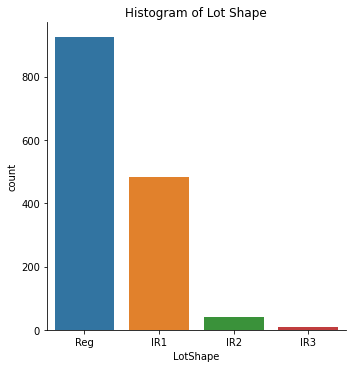

In [ ]:
#Plot LotShape before OHE
plt.figure
ax= sns.catplot(x='LotShape', kind="count",data=df).set(
    title='Histogram of Lot Shape')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

<bound method Figure.show of <Figure size 432x288 with 4 Axes>>

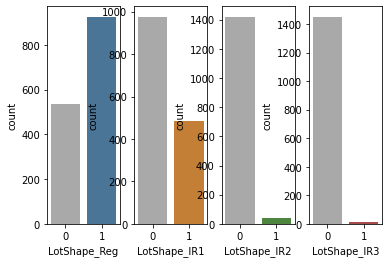

In [ ]:
#Plot LotShape after OHE
fig,ax=plt.subplots(1,4)
sns.countplot(df2['LotShape_Reg'],ax=ax[0], palette=['#A9A9A9','#3E76A3'])
sns.countplot(df2['LotShape_IR1'],ax=ax[1], palette=['#A9A9A9','#DA801E'])
sns.countplot(df2['LotShape_IR2'],ax=ax[2], palette=['#A9A9A9','#479234'])
sns.countplot(df2['LotShape_IR3'],ax=ax[3], palette=['#A9A9A9','#B83B3B'])
fig.show

####4.  Split training data into Train Data and Holdout data (70:30)

In [ ]:
from sklearn.model_selection import train_test_split

#Prepare X (with all remaining features) & y
ignored=['SalePrice']
features= [c for c in df2.columns if c not in ignored]
X=df2[features].copy()
y=df['SalePrice']

#Split training data (70%) & validation data(30%)
X_train, X_val, y_train, y_val = train_test_split(X, y, 
    test_size=0.3, random_state= 8)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(1022, 231)
(1022,)


####5. Cherry pick variables based on correlation and check significance of variables


In [ ]:
from sklearn import datasets, linear_model
import statsmodels.api as sm
from scipy import stats

In [ ]:
#Drop variable with high correlation
all_col=list(df2.columns)
orig_df=df2
dropped=[]
for col in all_col:
  cor_matrix = orig_df.corr().abs()
  upper_tri= cor_matrix.where(np.triu(np.ones(
      cor_matrix.shape),k=1).astype(bool))
  if any(upper_tri[col] > 0.8):
    all_col.remove(col)
    orig_df=orig_df[all_col]
    dropped.append(col)

dropped

['1stFlrSF',
 'TotRmsAbvGrd',
 'GarageArea',
 'Floor',
 'FireplaceQu2',
 'MSZoning_RM',
 'Street_Pave',
 'LotShape_Reg',
 'LandSlope_Mod',
 'Neighborhood_Somerst',
 'BldgType_2fmCon',
 'RoofStyle_Hip',
 'RoofMatl_Tar&Grv',
 'Exterior2nd_AsbShng',
 'Exterior2nd_CBlock',
 'Exterior2nd_HdBoard',
 'Exterior2nd_MetalSd',
 'Exterior2nd_VinylSd',
 'MasVnrType_None',
 'BsmtExposure_None',
 'BsmtFinType1_None',
 'BsmtFinType2_None',
 'Electrical_SBrkr',
 'GarageType_None',
 'GarageFinish_None',
 'PavedDrive_Y',
 'SaleCondition_Partial',
 'CentralAir_Y']

In [ ]:
X_train2 = X_train.drop(X_train[dropped], axis=1)

In [ ]:
#Check p values each features
X_train3=sm.add_constant(X_train2)
est=sm.OLS(y_train,X_train3).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     44.72
Date:                Mon, 12 Sep 2022   Prob (F-statistic):               0.00
Time:                        01:05:57   Log-Likelihood:                -11785.
No. Observations:                1022   AIC:                         2.395e+04
Df Residuals:                     833   BIC:                         2.488e+04
Df Model:                         188                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -3.217e+

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
#Select significant variable P-values < 0.05
significant_var = est.pvalues[est.pvalues <= .05].index[1:] 
print(significant_var)

Index(['OverallQual', 'OverallCond', 'MasVnrArea', 'GrLivArea', 'FullBath',
       'BedroomAbvGr', 'GarageCars', 'ScreenPorch', 'PoolArea', 'condition_ct',
       'BsmtQual2', 'HeatingQC2', 'KitchenQual2', 'GarageQual2',
       'MSSubClass_20', 'MSSubClass_30', 'MSSubClass_160', 'MSSubClass_180',
       'LotShape_IR3', 'Utilities_AllPub', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'RoofStyle_Flat',
       'RoofStyle_Gable', 'RoofStyle_Shed', 'RoofMatl_CompShg',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior2nd_ImStucc',
       'MasVnrType_BrkFace', 'Heating_Wall', 'GarageType_2Types'],
      dtype='object')


In [ ]:
X_train4= X_train3[significant_var]
X_train4.head()

,OverallQual,OverallCond,MasVnrArea,GrLivArea,FullBath,BedroomAbvGr,GarageCars,ScreenPorch,PoolArea,condition_ct,...,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior2nd_ImStucc,MasVnrType_BrkFace,Heating_Wall,GarageType_2Types
969,6,5,0.010422,-0.800425,1,2,1,-0.270208,0,0,...,0,0,0,1,0,0,0,1,0,0
273,6,6,0.442149,0.221847,2,3,1,-0.270208,0,1,...,0,0,0,1,0,0,0,0,0,0
248,7,5,-0.011718,0.290379,2,3,2,-0.270208,0,0,...,0,1,0,1,0,0,0,1,0,0
382,7,5,-0.570750,0.535953,2,3,2,-0.270208,0,0,...,0,1,0,1,0,0,0,0,0,0
553,4,5,-0.570750,-0.741411,2,2,2,-0.270208,0,1,...,0,1,0,1,0,0,0,0,0,0


Now we have chosen 20 variables that are non-multicollinear and statistically significant

### Question 5. Using ordinary least squares (OLS), try to predict house prices on this dataset. Choose the features (or combinations of features) you would like to use or ignore, provided you justify your choice. Evaluate your predictions on the training set using the MSE and the R2 score. For this question, you need to implement OLS from scratch without using any external libraries or packages.

6. Select features and create OLS model using Train Data

In [ ]:
#Calculate the theta
X=np.asmatrix(X_train4)
y=y_train.values
X_transpose = X.transpose()

In [ ]:
theta=np.linalg.pinv(X_transpose.dot(X)).dot(X_transpose).dot(y)
theta
theta.shape

(1, 33)

In [ ]:
#Calculate y_estimate
y_estimate=X.dot(theta.transpose()).transpose()
y_estimate

matrix([[118278.3625534 , 180374.60443384, 198495.20257477, ...,
         126540.76484608, 150297.15712108, 298169.80981008]])

In [ ]:
#Calculate MSE
mse=(((y-y_estimate).dot((y-y_estimate).transpose())))/len(y)
mse

matrix([[1.00698384e+09]])

In [ ]:
#Calculate R2
y_mean = np.mean(y)

ss_tot=(y-y_mean).dot((y-y_mean).transpose())
ss_res=((y-y_estimate).dot((y-y_estimate).transpose()))[(0,0)]
r2=1-ss_res/ss_tot
r2

0.8504705975116206

7. Evaluate model to Holdout data and measure the R2

In [ ]:
X_val2= X_val[X_train4.columns] #select significant variables in holdout data
X2=np.asmatrix(X_val2)
y2=y_val.values
X_transpose2 = X2.transpose()

In [ ]:
#Calculate y_estimate
y_estimate2= X2.dot(theta.transpose()).transpose()
y_estimate2= np.array(y_estimate2[0,:])

In [ ]:
#Calculate MSE
mse2=(((y2-y_estimate2).dot((y2-y_estimate2).transpose())))/len(y2)
mse2

array([[1.1587204e+09]])

In [ ]:
#Calculate R2
y_mean2 = np.mean(y2)
ss_tot2=(y2-y_mean2).dot((y2-y_mean2).transpose())
ss_res2=((y2-y_estimate2).dot((y2-y_estimate2).transpose()))[(0,0)]
r22=1-ss_res2/ss_tot2
r22

0.7812124676646445

Since the R2 forvalidation set is at pretty good level of 78%, we feel confortable with our model and would like to retain the model with all training data+validation data

8.  Re-train the model now using all training dataset

In [ ]:
#Train model

X_train_all= pd.concat([X_train4, X_val2])
Y_train_all=pd.concat([y_train,y_val])
X_train_all.head()

,OverallQual,OverallCond,MasVnrArea,GrLivArea,FullBath,BedroomAbvGr,GarageCars,ScreenPorch,PoolArea,condition_ct,...,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior2nd_ImStucc,MasVnrType_BrkFace,Heating_Wall,GarageType_2Types
969,6,5,0.010422,-0.800425,1,2,1,-0.270208,0,0,...,0,0,0,1,0,0,0,1,0,0
273,6,6,0.442149,0.221847,2,3,1,-0.270208,0,1,...,0,0,0,1,0,0,0,0,0,0
248,7,5,-0.011718,0.290379,2,3,2,-0.270208,0,0,...,0,1,0,1,0,0,0,1,0,0
382,7,5,-0.570750,0.535953,2,3,2,-0.270208,0,0,...,0,1,0,1,0,0,0,0,0,0
553,4,5,-0.570750,-0.741411,2,2,2,-0.270208,0,1,...,0,1,0,1,0,0,0,0,0,0


In [ ]:
#Calculate theta
X=np.asmatrix(X_train_all)
y=Y_train_all.values
X_transpose = X.transpose()
theta_all=np.linalg.pinv(X_transpose.dot(X)).dot(X_transpose).dot(y)
theta_all

matrix([[ 1.18274393e+04,  3.74927431e+03,  6.96985921e+03,
          3.13203151e+04,  4.78508396e+03, -6.30666757e+03,
          1.41875744e+04,  2.15946519e+03,  1.95949015e+01,
         -1.25042909e+04,  1.09978004e+04,  2.02083179e+03,
          1.10979524e+04, -2.99890832e+03,  1.90223176e+04,
          2.54700914e+03, -2.87643113e+04, -6.28178591e+03,
         -6.31599289e+03, -7.77103659e+04,  4.24307855e+04,
          4.05971009e+04,  5.26513756e+04,  7.09102805e+04,
         -5.82559526e+03,  2.95896526e+04,  7.22299561e+04,
          5.36327959e+04,  1.63448945e+05,  2.41452693e+04,
         -7.95042145e+03,  2.38670266e+04, -2.27377577e+04]])

In [ ]:
theta_all.shape

(1, 33)

9. Predict the housing price using test data

Cleaning test data by imputing null values, normalizing continous variable, and encoding categorical values,- just as what we've done for training data

In [ ]:
df_t2= one_hot_encoded_test.copy()

In [ ]:
df_t2.isnull().sum().sort_values(ascending=False).head(10)

LotFrontage            0
Exterior2nd_Plywood    0
Exterior2nd_Stucco     0
Exterior2nd_VinylSd    0
Exterior2nd_Wd Sdng    0
Exterior2nd_Wd Shng    0
MasVnrType_BrkCmn      0
MasVnrType_BrkFace     0
MasVnrType_None        0
MasVnrType_Stone       0
dtype: int64

In [ ]:
X_test=df_t2[X_train_all.columns]
X_test.head()

,OverallQual,OverallCond,MasVnrArea,GrLivArea,FullBath,BedroomAbvGr,GarageCars,ScreenPorch,PoolArea,condition_ct,...,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior2nd_ImStucc,MasVnrType_BrkFace,Heating_Wall,GarageType_2Types
0,5,6,-0.570750,-1.179256,1,2,1.0,1.882709,0,1,...,0,1,0,1,0,0,0,0,0,0
1,6,6,0.027027,-0.354966,1,3,1.0,-0.270208,0,0,...,0,0,0,1,0,0,0,1,0,0
2,5,5,-0.570750,0.216136,2,3,2.0,-0.270208,0,0,...,0,1,0,1,0,0,0,0,0,0
3,6,6,-0.460051,0.168544,2,3,2.0,-0.270208,0,0,...,0,1,0,1,0,0,0,1,0,0
4,8,5,-0.570750,-0.448246,2,2,2.0,2.313293,0,0,...,0,1,0,1,0,0,0,0,0,0


In [ ]:
X_test2=np.asmatrix(X_test)
X_test2_transpose = X_test2.transpose()

In [ ]:
#Calculate y_estimate
y_test_predict= X_test2.dot(theta_all.transpose()).transpose()
y_test_predict= np.array(y_test_predict[0,:])

In [ ]:
y_test_predict

array([[109710.14022785, 162042.62887655, 164182.43079139, ...,
        146487.00764819,  98706.12054458, 221841.98817681]])

In [ ]:
output = pd.DataFrame({'Id':df_t['Id'].values,'SalePrice': y_test_predict[0,:]},
                      columns=['Id','SalePrice'])

In [ ]:
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:
output.to_csv('/drive/My Drive/houseprice4.csv',index=False)